In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import auc, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Download Heart Disease Data Set to Notebook's local filesystem**

---



Heart Disease Data Set is a freely available data set on the UCI Machine Learning Repository portal.

*   Heart Disease Data Set is hosted in URL -> (http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data).

*   In the following cell, replace the link_to_data variable value with the URL mentioned above.



In order to download the data from UCI Machine Learning Repository, we will be using "wget" library. Please install this library if have you have not installed it already.The command to install "wget" library is --- "!pip install wget --user"

Now, the code in the cell below downloads the data set and saves it in the local filesystem. The name of downloaded file containing the data will be displayed in the output of this cell.

In [2]:
!pip install wget
import wget

link_to_data = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
ClevelandDataSet = wget.download(link_to_data)

print(ClevelandDataSet)

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=d0d18ecf34e12ef07198483b2fe98ee59e05836577854365a3efb9a427285430
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
processed.cleveland.data


The csv file - processed.cleveland.data containing the heart disease data set is now availble on local filesystem.

The downloaded data set contains the following attributes pertaining to heart disease.

---



**Data set Details**:

---



**age** - age in years

**sex** - sex(1 = male; 0 = female)

**cp** - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)

**trestbps** - resting blood pressure (in mm Hg on admission to the hospital)

**chol** - serum cholestoral in mg/dl

**fbs**- fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

**restecg** - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)

**thalach** - maximum heart rate achieved

**exang** - exercise induced angina (1 = yes; 0 = no)

**oldpeak** - ST depression induced by exercise relative to rest

**slope** - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)

**ca** - number of major vessels (0-3) colored by flourosopy

**thal** - 3 = normal; 6 = fixed defect; 7 = reversable defect

**num** - the predicted attribute - diagnosis of heart disease (angiographic disease status) 

(Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing)

---



**Load and explore data**

---



In this section you will load the data as Pandas DataFrame and perform a basic exploration.

Let us now load the data in the csv file - processed.cleveland.data into a Pandas DataFrame using code below.

In [5]:
import pandas as pd

col_names = ['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

heart_df = pd.read_csv(ClevelandDataSet, sep=',', header=None, names=col_names, na_filter= True, na_values= {'ca': '?', 'thal': '?'})
heart_df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
(samples, attributes) = heart_df.shape
print("No. of Sample data =", samples )
print("No. of Attributes  =", attributes)

No. of Sample data = 303
No. of Attributes  = 14


We have 303 rows of sample data with 14 columns of data per sample.


---


**Prepare the target data**


In this section, we transform the existing DataFrame to derive the target data that contains the prediction value for the corresponding sample data.

The goal of the model here is to predict if a patient has a heart problem or not. But the data set currently available does not have this information. However, this information can be derived from the 'num' attribute. 

The '**num**' column and its values pertains to number of major vessels with more than 50% narrowed (values- 0,1,2,3 or 4) for the corresponding sample data.


Therefore, the target column '**diagnosed**' can derived as ...

'**diagnosed**' is '0' when '**num**' = 0 , indicating normal heart functioning

'**diagnosed**' is '1' when '**num'** > 0 , indicating a heart problem.

In [6]:
heart_df['diagnosed'] = heart_df['num'].map(lambda d: 1 if d > 0 else 0)
heart_df = heart_df.drop('num', 1)
heart_df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosed
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
#rows having missing values
null_data = heart_df[heart_df.isnull().any(axis=1)]
null_data

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosed
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [0]:
#delete missing value containing rows
heart_df = heart_df.dropna(how='any',axis=0)

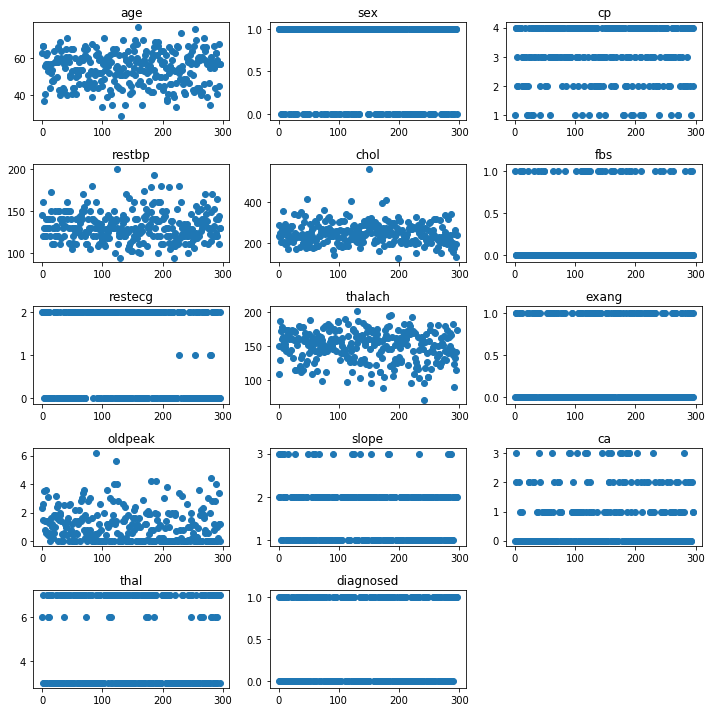

In [10]:
for i,col in enumerate(heart_df.columns.values):
    plt.subplot(5,3,i+1)
    plt.scatter([i for i in range(297)],heart_df[col].values.tolist())
    plt.title(col)
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(10,10)
    plt.tight_layout()
plt.show()

Let's change the column names to be a bit clearer,

In [11]:
heart_df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
heart_df.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Converting age to a categorical variable

In [12]:
#set up bins
bin = [25,40,50,60,70,80]
#use pd.cut function can attribute the values into its specific bins
category = pd.cut(heart_df.age,bin,labels=['25-40','40-50','50-60','60-70','70-80'])
category = category.to_frame()
category.columns = ['age_range']
#concatenate age and its bin
df_new = pd.concat([heart_df,category],axis = 1)
print(df_new.head())


    age  sex  chest_pain_type  ...  thalassemia  target  age_range
0  63.0  1.0              1.0  ...          6.0       0      60-70
1  67.0  1.0              4.0  ...          3.0       1      60-70
2  67.0  1.0              4.0  ...          7.0       1      60-70
3  37.0  1.0              3.0  ...          3.0       0      25-40
4  41.0  0.0              2.0  ...          3.0       0      40-50

[5 rows x 15 columns]


In [13]:
#set up bins
bin = [90,119,129,139,179,200]
#use pd.cut function can attribute the values into its specific bins
category = pd.cut(df_new.resting_blood_pressure,bin,labels=['90-119','119-129','129-139','139-179','179-200'])
category = category.to_frame()
category.columns = ['resting_blood_pressure_levels']
#concatenate age and its bin
df_new_1 = pd.concat([df_new,category],axis = 1)
df_new_1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_range,resting_blood_pressure_levels
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,60-70,139-179
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,60-70,139-179
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,60-70,119-129
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,25-40,129-139
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,40-50,129-139


In [14]:
#set up bins
bin = [125,200,239,600]
#use pd.cut function can attribute the values into its specific bins
category = pd.cut(df_new_1.cholesterol,bin,labels=['125-200','200-239','239-600'])
category = category.to_frame()
category.columns = ['cholesterol_levels']
#concatenate age and its bin
df_new_2 = pd.concat([df_new_1,category],axis = 1)
df_new_2.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_range,resting_blood_pressure_levels,cholesterol_levels
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,60-70,139-179,200-239
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,60-70,139-179,239-600
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,60-70,119-129,200-239
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,25-40,129-139,239-600
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,40-50,129-139,200-239


maximum heart rate achieved(thalach)


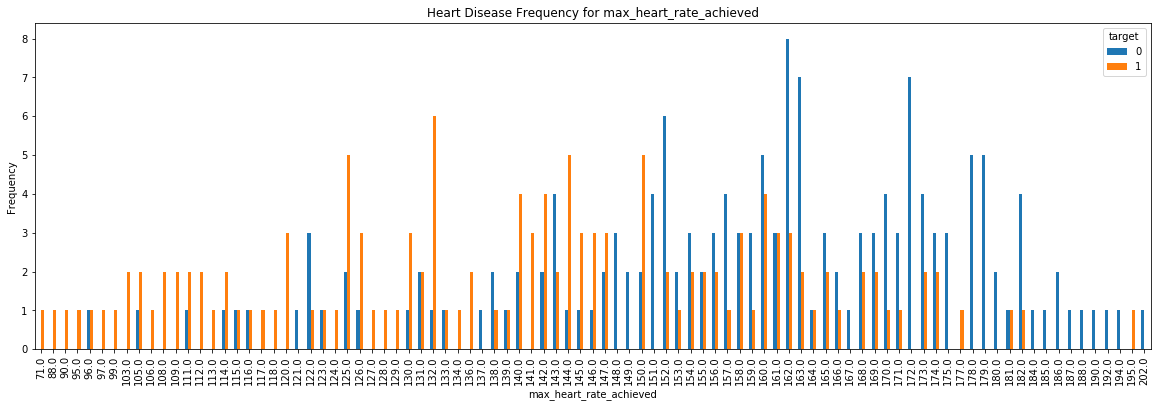

In [15]:
pd.crosstab(df_new_2.max_heart_rate_achieved,df_new_2.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for max_heart_rate_achieved')
plt.xlabel('max_heart_rate_achieved')
plt.ylabel('Frequency')
#plt.savefig('heartDiseaseAndcholesterol.png')
plt.show()

**ST depression induced by exercise relative to rest (oldpeak)**

In exercise, the heart will consume more oxygen and nutrient, which can introduce shortage of blood transmitted to the heart by coronary arteries.

As we learned above, if myocardium lack blood for a long time, the cells in myocardium will be damaged, which can result in depression in ST segment. This feature will expose some not-easy-to-detect heart diseases.

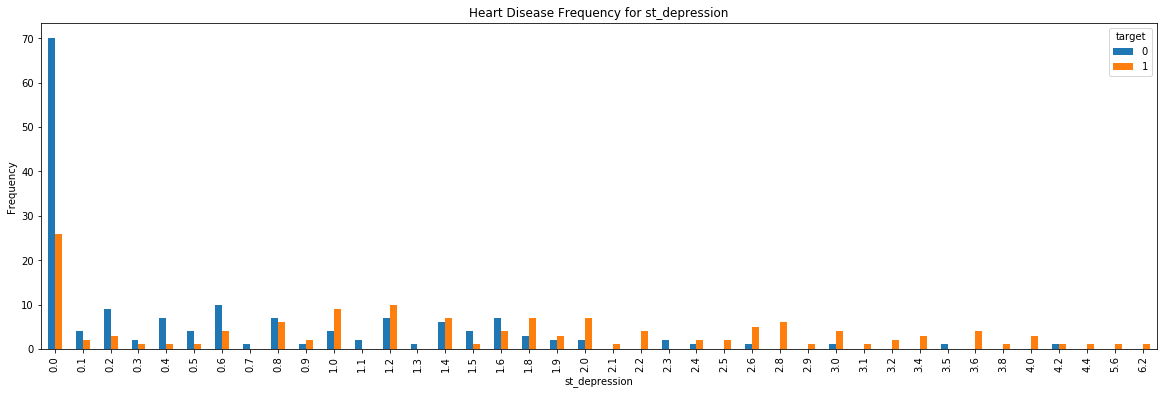

In [16]:
pd.crosstab(df_new_2.st_depression,df_new_2.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for st_depression')
plt.xlabel('st_depression')
plt.ylabel('Frequency')
#plt.savefig('heartDiseaseAndcholesterol.png')
plt.show()

In [17]:
df_new_2.nunique()

age                               41
sex                                2
chest_pain_type                    4
resting_blood_pressure            50
cholesterol                      152
fasting_blood_sugar                2
rest_ecg                           3
max_heart_rate_achieved           91
exercise_induced_angina            2
st_depression                     40
st_slope                           3
num_major_vessels                  4
thalassemia                        3
target                             2
age_range                          5
resting_blood_pressure_levels      5
cholesterol_levels                 3
dtype: int64

In [18]:
new_df = df_new_2.drop(columns=['age','resting_blood_pressure','cholesterol'])
new_df.columns

Index(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target', 'age_range',
       'resting_blood_pressure_levels', 'cholesterol_levels'],
      dtype='object')

In [20]:
#binary encoding for categorical variable
!pip install category_encoders
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['chest_pain_type', 'rest_ecg',
        'st_slope', 'num_major_vessels', 'thalassemia',
        'age_range', 'resting_blood_pressure_levels',
       'cholesterol_levels'])
new_df_1 = encoder.fit_transform(new_df)

new_df_1.head()

     |████████████████████████████████| 102kB 3.3MB/s 


,sex,chest_pain_type_0,chest_pain_type_1,chest_pain_type_2,fasting_blood_sugar,rest_ecg_0,rest_ecg_1,rest_ecg_2,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_0,st_slope_1,st_slope_2,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,thalassemia_0,thalassemia_1,thalassemia_2,target,age_range_0,age_range_1,age_range_2,age_range_3,resting_blood_pressure_levels_0,resting_blood_pressure_levels_1,resting_blood_pressure_levels_2,resting_blood_pressure_levels_3,cholesterol_levels_0,cholesterol_levels_1,cholesterol_levels_2
0,1.0,0,0,1,1.0,0,0,1,150.0,0.0,2.3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
1,1.0,0,1,0,0.0,0,0,1,108.0,1.0,1.5,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1
2,1.0,0,1,0,0.0,0,0,1,129.0,1.0,2.6,0,1,0,0,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,1,0
3,1.0,0,1,1,0.0,0,1,0,187.0,0.0,3.5,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1
4,0.0,1,0,0,0.0,0,0,1,172.0,0.0,1.4,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0


In [21]:
new_df_1.columns

Index(['sex', 'chest_pain_type_0', 'chest_pain_type_1', 'chest_pain_type_2',
       'fasting_blood_sugar', 'rest_ecg_0', 'rest_ecg_1', 'rest_ecg_2',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_0', 'st_slope_1', 'st_slope_2', 'num_major_vessels_0',
       'num_major_vessels_1', 'num_major_vessels_2', 'thalassemia_0',
       'thalassemia_1', 'thalassemia_2', 'target', 'age_range_0',
       'age_range_1', 'age_range_2', 'age_range_3',
       'resting_blood_pressure_levels_0', 'resting_blood_pressure_levels_1',
       'resting_blood_pressure_levels_2', 'resting_blood_pressure_levels_3',
       'cholesterol_levels_0', 'cholesterol_levels_1', 'cholesterol_levels_2'],
      dtype='object')

In [23]:
#dataframe to numpy array
feature_df = new_df_1[['sex', 'chest_pain_type_0', 'chest_pain_type_1', 'chest_pain_type_2',
       'fasting_blood_sugar', 'rest_ecg_0', 'rest_ecg_1', 'rest_ecg_2',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_0', 'st_slope_1', 'st_slope_2', 'num_major_vessels_0',
       'num_major_vessels_1', 'num_major_vessels_2', 'thalassemia_0',
       'thalassemia_1', 'thalassemia_2', 'age_range_0',
       'age_range_1', 'age_range_2', 'age_range_3',
       'resting_blood_pressure_levels_0', 'resting_blood_pressure_levels_1',
       'resting_blood_pressure_levels_2', 'resting_blood_pressure_levels_3',
       'cholesterol_levels_0', 'cholesterol_levels_1', 'cholesterol_levels_2']]
X = np.asarray(feature_df)
X[0:5]

array([[  1. ,   0. ,   0. ,   1. ,   1. ,   0. ,   0. ,   1. , 150. ,
          0. ,   2.3,   0. ,   0. ,   1. ,   0. ,   0. ,   1. ,   0. ,
          0. ,   1. ,   0. ,   0. ,   1. ,   0. ,   0. ,   0. ,   1. ,
          0. ,   0. ,   0. ,   1. ,   0. ],
       [  1. ,   0. ,   1. ,   0. ,   0. ,   0. ,   0. ,   1. , 108. ,
          1. ,   1.5,   0. ,   1. ,   0. ,   0. ,   1. ,   0. ,   0. ,
          1. ,   0. ,   1. ,   0. ,   1. ,   0. ,   0. ,   0. ,   1. ,
          0. ,   0. ,   0. ,   1. ,   1. ],
       [  1. ,   0. ,   1. ,   0. ,   0. ,   0. ,   0. ,   1. , 129. ,
          1. ,   2.6,   0. ,   1. ,   0. ,   0. ,   1. ,   1. ,   0. ,
          1. ,   1. ,   1. ,   0. ,   1. ,   0. ,   0. ,   0. ,   0. ,
          1. ,   0. ,   0. ,   1. ,   0. ],
       [  1. ,   0. ,   1. ,   1. ,   0. ,   0. ,   1. ,   0. , 187. ,
          0. ,   3.5,   0. ,   0. ,   1. ,   0. ,   0. ,   1. ,   0. ,
          1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. ,
          1. ,  

In [24]:
y = np.asarray(new_df_1['target'])
y[0:5]

array([0, 1, 1, 0, 0])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (237, 32) (237,)
Test set: (60, 32) (60,)


In [0]:
import xgboost as xgb
#!pip install hyperopt
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK


xgdmat = xgb.DMatrix(X_train, y_train) # Create our DMatrix to make XGBoost more efficient

In [27]:
def step_xgb(params):
        xgb_cv = xgb.cv(params=params,
                    dtrain=xgdmat,
                    num_boost_round=1000,
                    early_stopping_rounds=50,
                    nfold=3,
                    as_pandas=True)
        score = (xgb_cv["test-error-mean"]).tail(1)
        #print(cname, score, len(cv), params)
        return dict(loss=score, status=STATUS_OK)
      
space_xgb = dict(
            max_depth = hp.choice('max_depth', range(2, 8)),
            subsample = hp.quniform('subsample', 0.6, 1, 0.05),
            colsample_bytree = hp.quniform('colsample_bytree', 0.6, 1, 0.05),
            learning_rate = hp.quniform('learning_rate', 0.005, 0.03, 0.005),
            min_child_weight = hp.quniform('min_child_weight', 1, 6, 1),
            gamma = hp.quniform('gamma', 0.5, 10, 0.05),

            objective = 'binary:logistic',
            #eval_metric = 'auc',
        )

trials = Trials()
best = fmin(step_xgb, space_xgb, algo=tpe.suggest, max_evals=2000, trials = trials)
print('best:')
print(best)

100%|██████████| 2000/2000 [15:47<00:00,  1.41it/s, best loss: 0.0]
best:
{'colsample_bytree': 0.8500000000000001, 'gamma': 3.8000000000000003, 'learning_rate': 0.025, 'max_depth': 2, 'min_child_weight': 2.0, 'subsample': 0.75}


In [0]:
final_gb = xgb.train(best, xgdmat, num_boost_round = 1000)

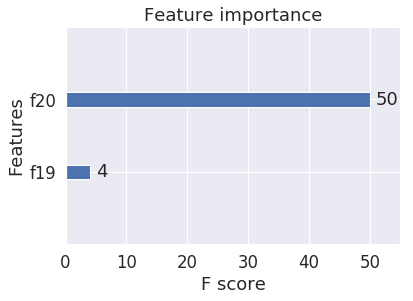

In [29]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)
xgb.plot_importance(final_gb)

In [30]:
importances = final_gb.get_fscore()
importances

{'f19': 4, 'f20': 50}

In [0]:
testdmat = xgb.DMatrix(X_test)

In [32]:
#prediction
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
y_pred

array([0.12577653, 0.8290089 , 0.12577653, 0.8290089 , 0.12577653,
       0.12577653, 0.12577653, 0.16130173, 0.8645341 , 0.12577653,
       0.8645341 , 0.12577653, 0.12577653, 0.12577653, 0.12577653,
       0.12577653, 0.16130173, 0.16130173, 0.8645341 , 0.12577653,
       0.8645341 , 0.8645341 , 0.8645341 , 0.12577653, 0.8645341 ,
       0.12577653, 0.8645341 , 0.8645341 , 0.12577653, 0.12577653,
       0.16130173, 0.12577653, 0.8645341 , 0.12577653, 0.12577653,
       0.12577653, 0.8645341 , 0.12577653, 0.8645341 , 0.8645341 ,
       0.12577653, 0.8645341 , 0.8645341 , 0.12577653, 0.12577653,
       0.8645341 , 0.12577653, 0.8645341 , 0.12577653, 0.12577653,
       0.12577653, 0.8645341 , 0.8290089 , 0.12577653, 0.8290089 ,
       0.8645341 , 0.12577653, 0.12577653, 0.8290089 , 0.16130173],
      dtype=float32)

In [33]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
y_pred

array([0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 0.], dtype=float32)

In [34]:
#accuracy score
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

(1.0, 0.0)